# Bigger Trees

The client bank *XYZ* is running a direct marketing (phone calls) campaign. The classification goal is to predict if the client will subscribe a term deposit.

The data is obtained from UCI Machine Learning repository. 
http://mlr.cs.umass.edu/ml/datasets/Bank+Marketing

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
train = pd.read_csv("../data/train.csv")

In [3]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

### Attribute Information:

#### bank client data:
- **age**: (numeric)
- **job** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- **marital** : marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
- **education** (categorical: 'basic.4y', 'basic.6y', 'basic.9y','high.school', 'illiterate' ,'professional.course', 'university.degree', 'unknown')
- **default**: has credit in default? (categorical: 'no','yes','unknown')
- **housing: has housing loan? (categorical: 'no','yes','unknown')
- **loan**: has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:
- **contact**: contact communication type (categorical: 'cellular', 'telephone') 
- **month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- **day**: last contact day of the month (numerical: 1, 2, 3, 4, ...)
- **duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### other attributes:
- **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- **previous**: number of contacts performed before this campaign and for this client (numeric)
- **poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### Output variable (desired target):
- **deposit** - has the client subscribed a term deposit? (binary: 'yes','no')

The given data is randomly divided into train and test for the purpose of this workshop. Build the model for train and use it to predict on test. 

## Exercise - Build a tree based model on 3 variables

Use the three variables - `age`, `balance`, and `campaign`

### Step 1: Visualise the variables

In [5]:
import seaborn as sns

In [8]:
train_3 = train.loc[:,('age', 'balance', 'campaign', 'deposit')]

In [9]:
train_3.head()

,age,balance,campaign,deposit
0,58,2143,1,no
1,44,29,1,no
2,33,2,1,no
3,47,1506,1,no
4,33,1,1,no


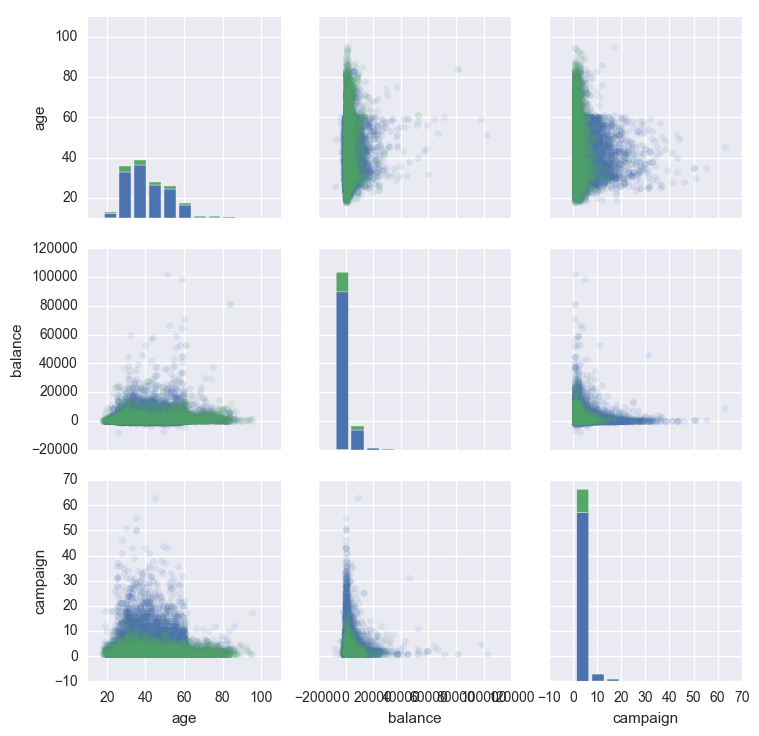

In [14]:
g = sns.PairGrid(train_3, hue = 'deposit')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, alpha = 0.1)

### Step 2: Encode the `deposit` variable

In [15]:
from sklearn import preprocessing

In [16]:
le = preprocessing.LabelEncoder()

In [21]:
train['deposit_label'] = le.fit_transform(train['deposit'])

In [22]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,deposit_label
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [25]:
train_3_data = train.loc[:,('age', 'balance', 'campaign')]
train_3_target = train.loc[:,'deposit_label']

### Step 3: Create a Decision Tree

In [26]:
from sklearn import tree

In [27]:
clf = tree.DecisionTreeClassifier(max_depth=4)

In [29]:
clf = clf.fit(train_3_data, train_3_target)

### Step 4: Visualise the Decison Tree

In [30]:
import pydotplus 
from IPython.display import Image

In [31]:
dot_data = tree.export_graphviz(clf, out_file='tree_3.dot', feature_names=train_3_data.columns,
                                class_names=['no', 'yes'], filled=True, 
                                rounded=True, special_characters=True)

In [34]:
graph = pydotplus.graph_from_dot_file('tree_3.dot')  

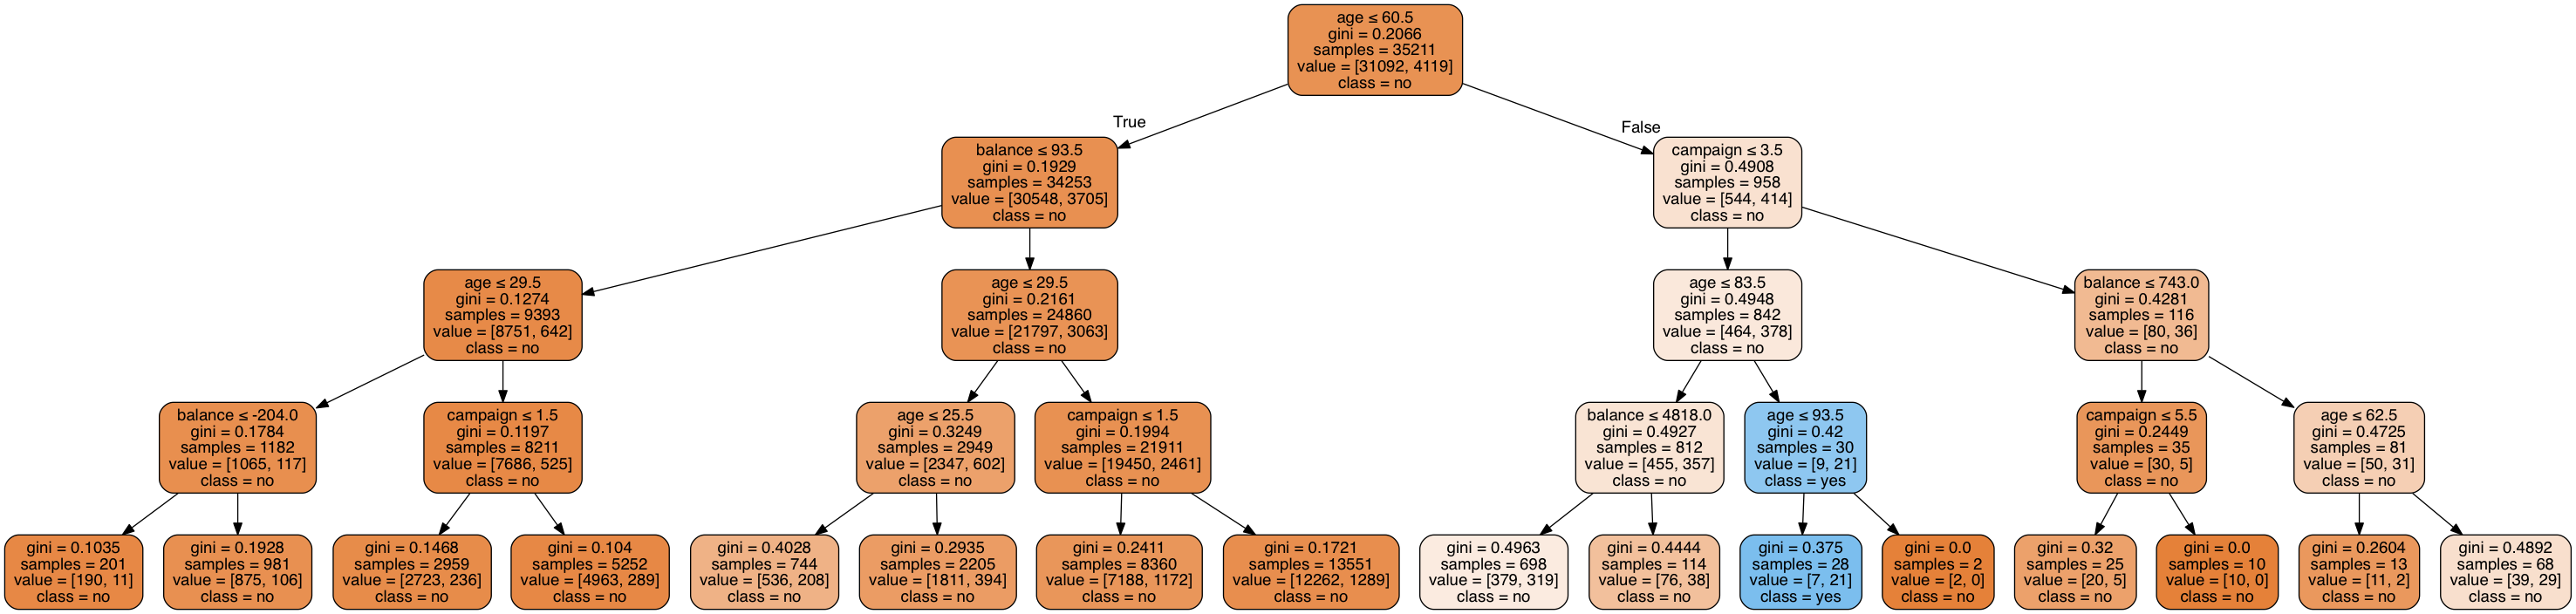

In [35]:
Image(graph.create_png()) 

### Step 5: Visualise the Decision Boundaries - Pairwise

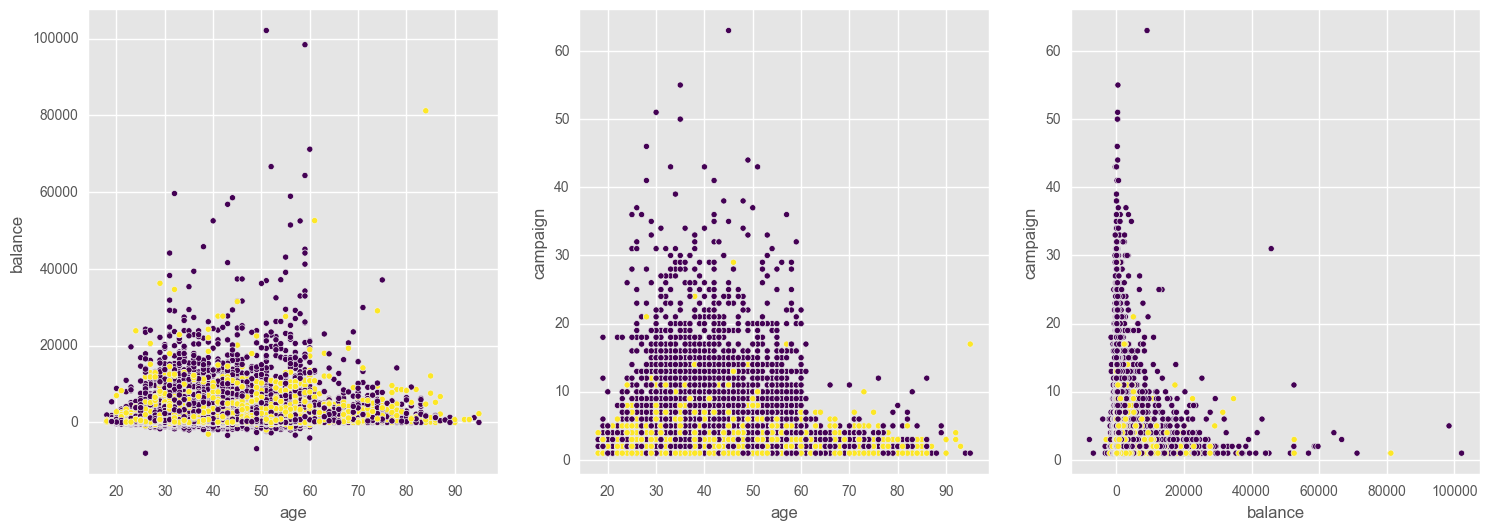

In [53]:
plt.figure(figsize=(16, 6))
for idx, pair in enumerate([[0, 1], [0, 2], [1, 2]]):
    X = train_3_data.iloc[:, pair]
    y = train_3_target
    
    plt.subplot(1, 3, idx + 1)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap = plt.cm.viridis)
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.axis("tight")

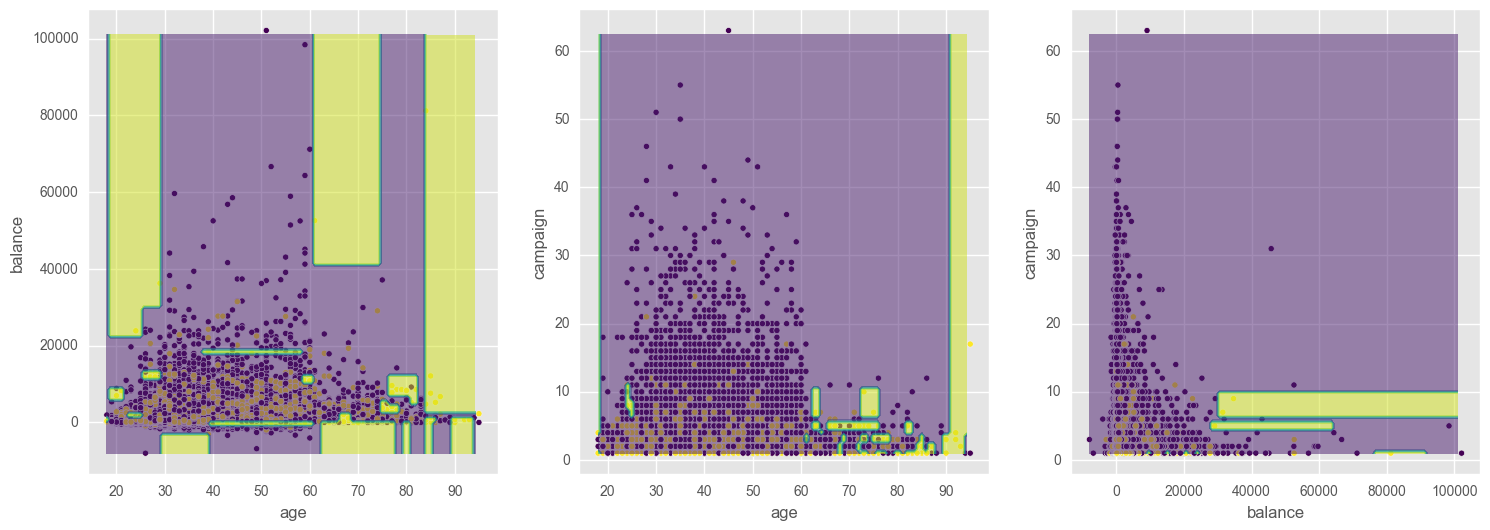

In [63]:
plt.figure(figsize=(16, 6))
for idx, pair in enumerate([[0, 1], [0, 2], [1, 2]]):
    X = train_3_data.iloc[:, pair]
    y = train_3_target
    
    plt.subplot(1, 3, idx + 1)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap = plt.cm.viridis)

    # Classify the points
    clf2 = tree.DecisionTreeClassifier(max_depth = 10).fit(X, y)
    x_min, x_max = X.ix[:, 0].min(), X.ix[:, 0].max()
    y_min, y_max = X.ix[:, 1].min(), X.ix[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max - x_min)/100),
                         np.arange(y_min, y_max, (y_max - y_min)/100))
    Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot the mesh                     
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.viridis, alpha = 0.5)
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.axis("tight")

### Step 6: Visualise the Decision Boundaries - All three Variables

In [65]:
from mpl_toolkits.mplot3d import Axes3D

In [75]:
plt.style.use('seaborn-notebook')

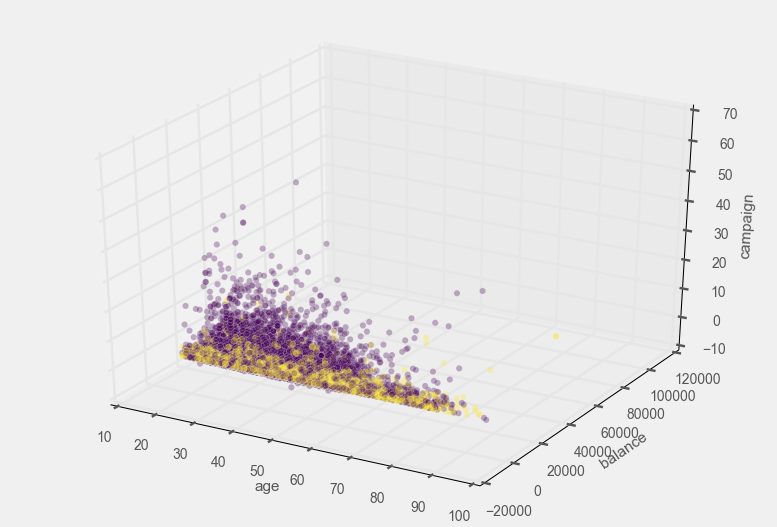

In [115]:
X = train_3_data
y = train_3_target

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=y, cmap = plt.cm.viridis, alpha = 0.3)

ax.set_xlabel(X.columns[0])
ax.set_ylabel(X.columns[1])
ax.set_zlabel(X.columns[2])
plt.tight_layout()

In [82]:
X = train_3_data
y = train_3_target

# Classify the points
clf3 = tree.DecisionTreeClassifier(max_depth = 10).fit(X, y)
x_min, x_max = X.ix[:, 0].min(), X.ix[:, 0].max()
y_min, y_max = X.ix[:, 1].min(), X.ix[:, 1].max()
z_min, z_max = X.ix[:, 2].min(), X.ix[:, 2].max()
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, (x_max - x_min)/25),
                     np.arange(y_min, y_max, (y_max - y_min)/25),
                     np.arange(z_min, z_max, (z_max - z_min)/25))
C = clf3.predict(np.c_[xx.ravel(), yy.ravel(), yy.ravel()])
C = C.reshape(xx.shape)

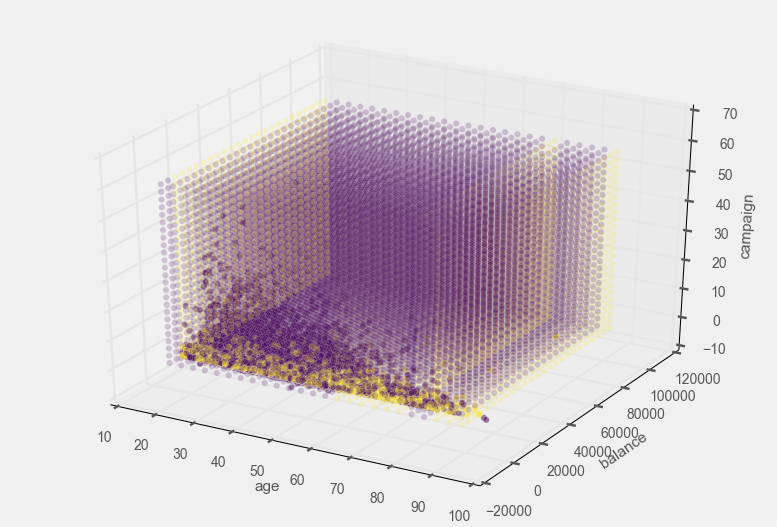

In [85]:
# plot the mesh and points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=y, cmap = plt.cm.viridis, alpha = 0.5)

ax.set_xlabel(X.columns[0])
ax.set_ylabel(X.columns[1])
ax.set_zlabel(X.columns[2])

ax.scatter(xx, yy, zz, c=C, cmap = plt.cm.viridis, alpha = 0.2)
plt.tight_layout()

In [104]:
import matplotlib.animation as animation
from IPython.display import HTML

In [117]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=y, cmap = plt.cm.viridis, alpha = 0.5)

ax.set_xlabel(X.columns[0])
ax.set_ylabel(X.columns[1])
ax.set_zlabel(X.columns[2])

ax.scatter(xx, yy, zz, c=C, cmap = plt.cm.viridis, alpha = 0.2)
plt.tight_layout()

# Animate by changing azimuth and elevation
azim = [i for i in range(0,360,36)]
elev = [i for i in range(0,360,36)]
def rotate(num, elev, azim):
    ax.view_init(elev=elev[num], azim=azim[num])

# Creating the Animation object
anim = animation.FuncAnimation(fig, rotate, 10, fargs=(elev, azim),
                                   interval=2000, blit=False)
plt.close(fig)

HTML(anim.to_html5_video())